In [1]:
# import dataset and obtain adjective tokenization

In [2]:
import numpy as np
import pandas as pd
import csv

original_df = pd.read_csv('/home/enrico/uni/sistemi-applicazioni-cloud/final-project/data/description-classification/winemag-data-130k-v2.csv')

In [3]:
# adjectives list

wine_descriptions = {
    'body': ['thin', 'cliff-edge', 'hollow', 'mellow', 'short', 'austere', 'angular', 'delicate', 'elegant', 'light-bodied', 'finesse',
    'closed', 'polished', 'complex', 'full-bodied', 'tight', 'firm', 'powerful', 'concentrated', 'dense', 'opulent', 'rich', 'extracted',        'flabby', 'fat'],
    'yeast': ['sour', 'cheesy', 'biscuit', 'creamy', 'buttery'],
    'style': ['barnyard', 'smoky', 'earthy', 'leathery', 'musky', 'fleshy', 'accessible', 'clean', 'delicate', 'elegant', 'polished', 'refined'],
    'tannin': ['bitter', 'harsh', 'aggressive', 'grippy', 'angular', 'powerful', 'coarse', 'leathery', 'rigid', 'muscular', 'firm', 'structured', 'chewy', 'chocolate', 'silky', 'smooth', 'round', 'opulent', 'velvety', 'voluptuous', 'supple', 'soft', 'mellow', 'spineless', 'flabby'],
    'acidity': ['bright', 'astringent', 'austere', 'thin', 'lean', 'angular', 'racy', 'tart', 'edgy', 'nerve', 'zippy', 'zesty', 'lively', 'fresh', 'crisp', 'delicate', 'soft', 'flabby', 'fallen over', 'flat'],
    'alcohol': ['jammy', 'hot', 'burn', 'legs', 'spicy'],
    'spice': ['spicy', 'musky', 'bright', 'pepper', 'anise', 'clove', 'cinnamon', 'nutmeg', 'saffron', 'ginger'],
    'fruit': ['jammy', 'ripe', 'juicy', 'flamboyant', 'fleshy', 'extracted', 'plummy', 'red fruit', 'black fruit', 'grapey', 'berry', 'cassis', 'citrus', 'stone fruit', 'tropical fruit', 'melon', 'apple', 'strawberry', 'raspberry', 'cherry', 'blueberry', 'blackberry', 'lime', 'lemon', 'orange', 'grapefruit', 'apricot', 'nectarine', 'peach', 'banana', 'pineapple', 'lychee', 'coconut'],
    'flower': ['white flowers', 'violet', 'perfumed', 'lavender', 'rose', 'citrus blossom', 'geranium'],
    'herb': ['stemmy', 'stalky', 'vegetal', 'asparagus', 'green', 'grassy', 'sage', 'eucalyptus', 'jalapeno', 'dill', 'bell pepper', 'gooseberry', 'quince'],
    'oak': ['smoky', 'charcoal', 'sweet tobacco', 'toasty', 'spicy', 'clove', 'nutty', 'coconut', 'caramel', 'vanilla', 'buttery', 'dill', 'creamy'],
    'inorganic': ['minerality', 'graphite', 'petichor', 'unctuous', 'oily', 'petroleum', 'plastic', 'tar', 'rubber', 'diesel', 'smoky']
}

wine_adj = np.unique(np.concatenate(list(wine_descriptions.values())))

In [4]:
# tokenize original dataset to get adjective dataset

adj_df = original_df.copy(deep=True)

matching = []
adj_presence = dict.fromkeys(wine_adj, 0)

for i, review in adj_df.iterrows():
    description_onegrams = review['description'].split()
    adj_match = list(set(description_onegrams) & set(wine_adj))
    matching.append(adj_match)
    for match in adj_match:
        adj_presence[match] += 1

adj_df = adj_df.assign(adjectives=pd.Series(matching))
adj_df = adj_df.assign(adjectives_count=adj_df['adjectives'].str.len())

In [5]:
# remove rows without adjectives

adj_df = adj_df[adj_df['adjectives_count'] > 0]

# how many rows were deletes?

print(f'Deleted {original_df.shape[0] - adj_df.shape[0]} rows without matching adjectives.')

Deleted 9625 rows without matching adjectives.


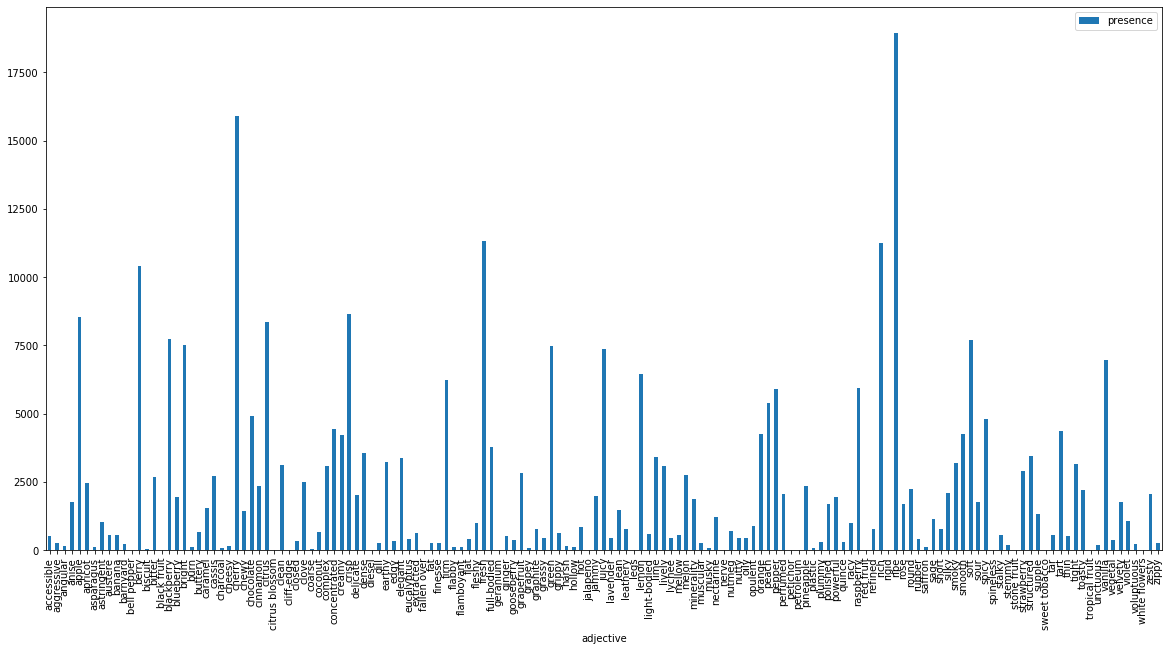

In [6]:
# check adjectives count distribution

adj_stat_df = pd.DataFrame([adj_presence.keys(), adj_presence.values()], index=['adjective', 'presence']).transpose()
adj_stat_df.plot(x='adjective', y='presence', kind='bar', figsize=(20, 10))

In [7]:
# transform adjectives list for each review into indicator variables

df = pd.get_dummies(pd.DataFrame(adj_df.adjectives.values.tolist()), prefix='adj')
df = df.groupby(by=df.columns, axis=1).any() * 1
df['variety'] = adj_df['variety'].array

In [8]:
# keep only varieties also used in the model that matches by description

vtk_df = pd.read_csv('/home/enrico/uni/sistemi-applicazioni-cloud/final-project/data/description-classification/varieties_to_keep.csv', names=['variety', 'keep'])

keep_varieties = list(vtk_df['variety'].array)

pre_row_count = df.shape[0]
df = df[df['variety'].isin(keep_varieties)]

# how many rows were deleted?

print(f'{pre_row_count - df.shape[0]} rows deleted')

11042 rows deleted


In [9]:
df

,adj_accessible,adj_aggressive,adj_angular,adj_anise,adj_apple,adj_apricot,adj_asparagus,adj_astringent,adj_austere,adj_banana,...,adj_toasty,adj_unctuous,adj_vanilla,adj_vegetal,adj_velvety,adj_violet,adj_voluptuous,adj_zesty,adj_zippy,variety
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,White Blend
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Portuguese Red
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pinot Gris
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Riesling
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gewürztraminer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Riesling
120342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pinot Noir
120343,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gewürztraminer
120344,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pinot Gris


In [10]:
# export df
df.to_csv('df.csv')

In [11]:
pd.Series(list(df['variety'].values)).value_counts() > 5

Pinot Noir                  True
Chardonnay                  True
Cabernet Sauvignon          True
Red Blend                   True
Bordeaux-style Red Blend    True
                            ... 
Montepulciano               True
Mourvèdre                   True
Primitivo                   True
Zweigelt                    True
Touriga Nacional            True
Length: 62, dtype: bool

In [12]:
# drop varieties with less than 5 entries as we may be using cross-validation further on

gt5_mask = pd.Series(list(df['variety'].values)).value_counts() > 5
gt5_list = list(gt5_mask[gt5_mask].index.array)

df = df[df['variety'].isin(gt5_list)]

print(f'{df.shape[0]} rows left')

109304 rows left


In [13]:
# split dataset into X and y for model training

X = df.filter(regex='adj_*')
y = df['variety']

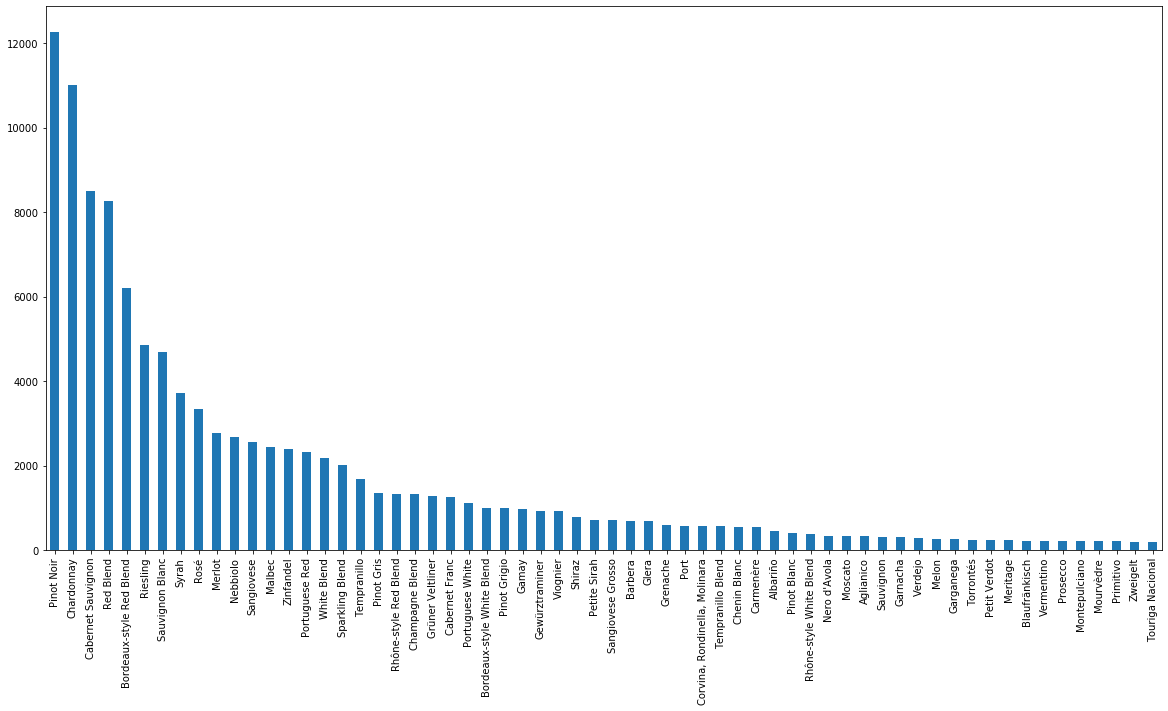

In [14]:
# check class distribution

pd.Series(y.values).value_counts().plot(kind='bar', figsize=(20, 10))

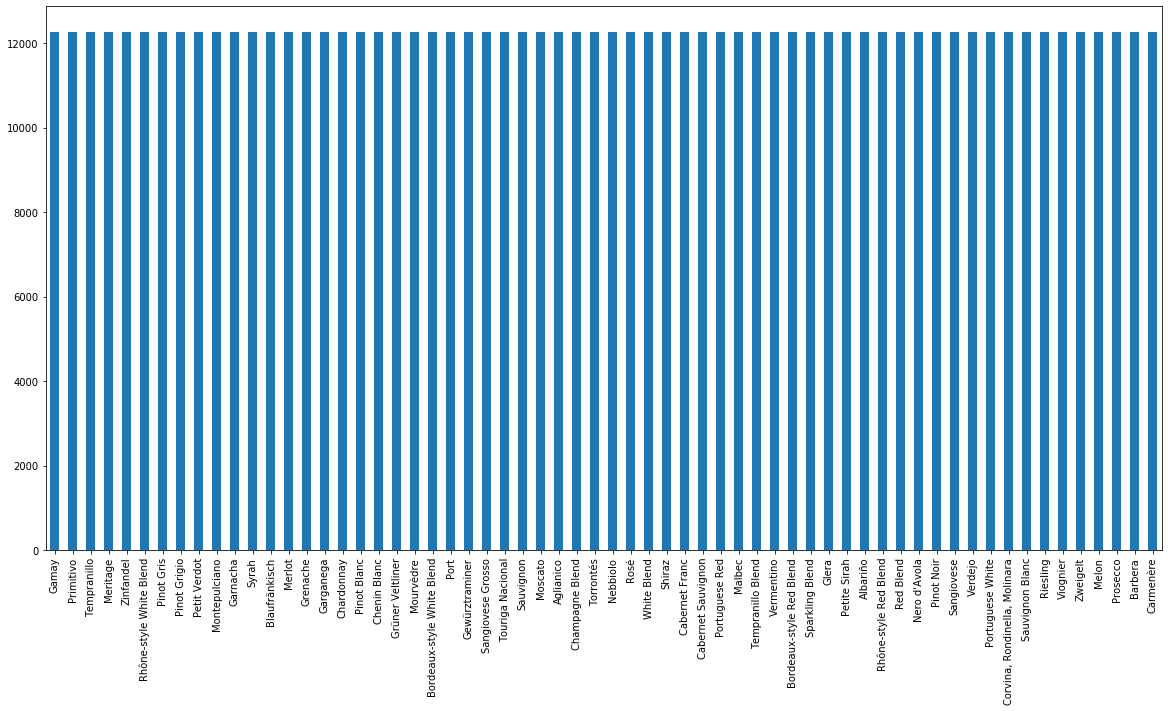

In [15]:
# the dataset is heavily unbalanced, let's work with oversampling/undersampling to achieve better classification

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_os, y_os = ros.fit_resample(X, y)

# check again class distribution

pd.Series(y_os).value_counts().plot(kind='bar', figsize=(20, 10))

In [16]:
# the class distribution is now uniform, although the high amount of generated rows might affect performances

In [17]:
# split oversampled X and y into training and test datasets

from sklearn.model_selection import train_test_split

X_os_train, X_os_test, y_os_train, y_os_test = train_test_split(X_os, y_os)

In [18]:
# use a Decision Tree classifier for the classification as it provides the most logical way around data classification for the use case

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

clf = DecisionTreeClassifier()

clf.fit(X_os_train, y_os_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
# evaluate the model

from sklearn.metrics import classification_report

y_os_pred = clf.predict(X_os_test)

print(classification_report(y_os_test, y_os_pred))

                               precision    recall  f1-score   support

                    Aglianico       0.63      0.78      0.69      3084
                     Albariño       0.77      0.74      0.75      2996
                      Barbera       0.80      0.65      0.72      3033
                Blaufränkisch       0.66      0.72      0.69      3005
     Bordeaux-style Red Blend       0.41      0.25      0.32      3067
   Bordeaux-style White Blend       0.43      0.53      0.47      2963
               Cabernet Franc       0.72      0.52      0.60      3104
           Cabernet Sauvignon       0.58      0.24      0.34      3034
                    Carmenère       0.43      0.66      0.52      3057
              Champagne Blend       0.49      0.47      0.48      3067
                   Chardonnay       0.70      0.18      0.29      3015
                 Chenin Blanc       0.69      0.58      0.63      3036
Corvina, Rondinella, Molinara       0.68      0.56      0.61      3027
     

The classifier works pretty well considering there are some classes with a high presence of adjectives. We have to make the assumption that the lack of adjectives is a feature (i.e. considering zeros in the indicator columns as a feature for a wine variety), although this may not be the best for matching the above mentioned varieties with lots of adjectives.

In [20]:
from sklearn.externals import joblib

joblib.dump(clf, 'model.joblib')

['model.joblib']